# Tugas No 1 Analisis Pengaruh Noise pada Sinyal Sinusoid

In [37]:
!pip install neurokit2

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from scipy import fft
import neurokit2 as nk
from scipy.signal import firwin, filtfilt, butter, lfilter
import datetime as dt

In [4]:
def calculate_scipy_fft(signal, fs):
    N = len(signal)

    # Calculate FFT
    fft_result = fft.fft(signal)

    # Calculate frequency axis
    frequencies = fft.fftfreq(N, d=1/fs)

    return frequencies, fft_result

SciPy FFT Computation Time: 0.0003 seconds


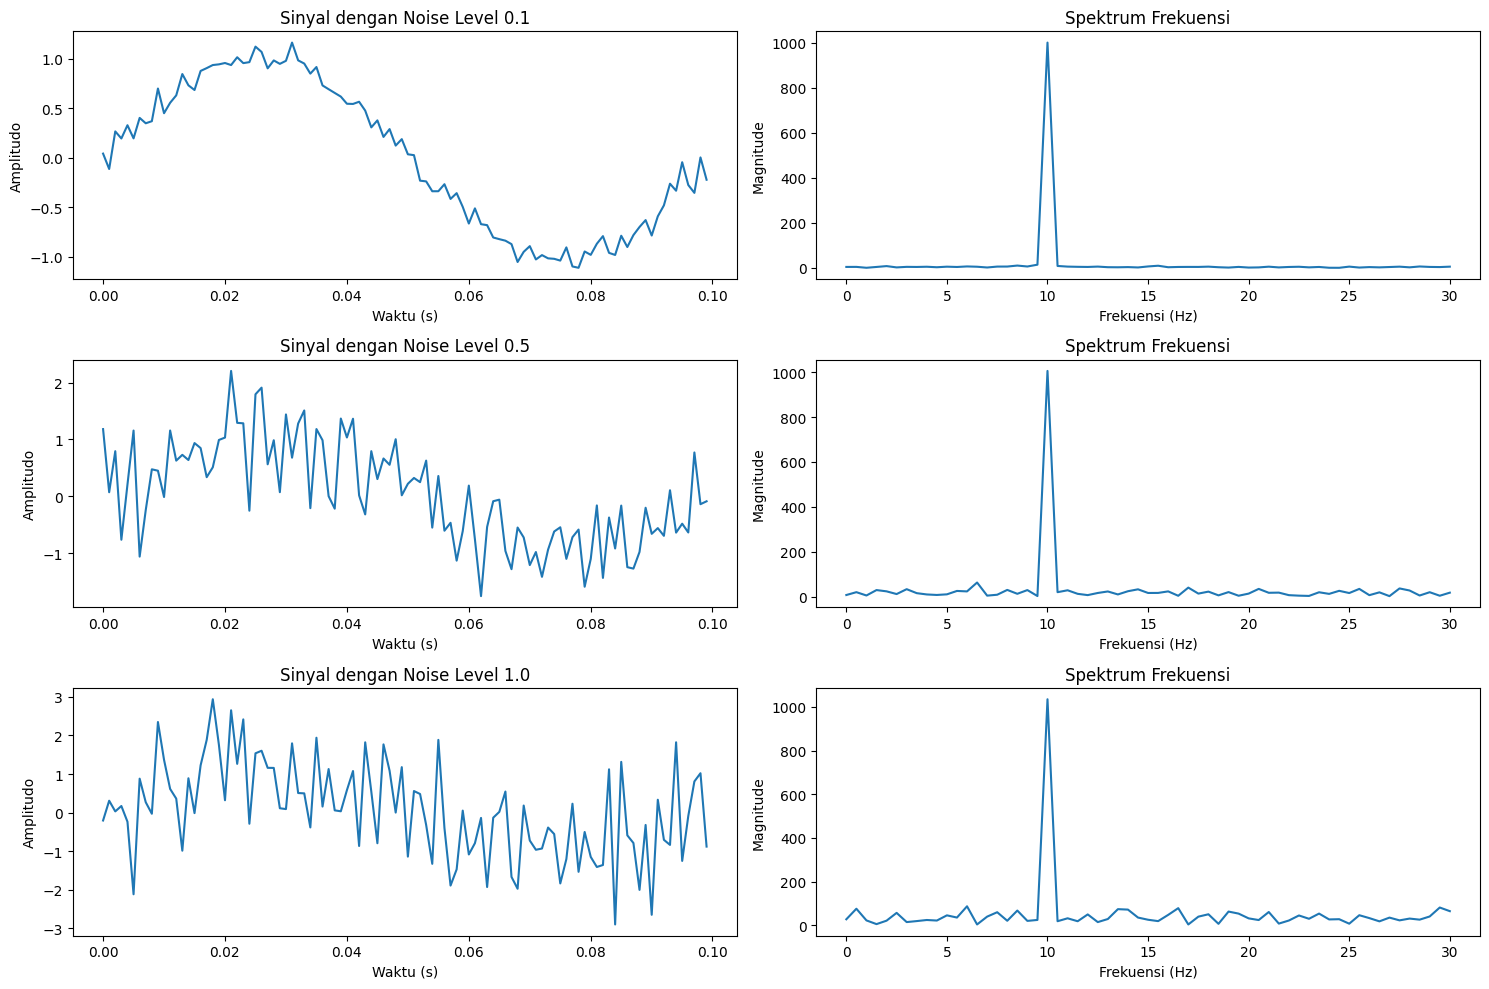

In [14]:
# 1. Buat sinyal sinusoid sederhana
fs = 1000  # sampling frequency
t = np.linspace(0, 2, 2*fs)  # 2 detik sinyal
f1 = 10  # frekuensi 10 Hz
signal = np.sin(2 * np.pi * f1 * t)

# 2. Tambahkan noise dengan berbagai level
noise_levels = [0.1, 0.5, 1.0]  # level noise yang berbeda
plt.figure(figsize=(15, 10))


for i, noise_level in enumerate(noise_levels, 1):
    # Tambahkan noise
    noisy_signal = signal + noise_level * np.random.normal(0, 1, len(t))

    # Hitung FFT
    freq, fft_result = calculate_scipy_fft(noisy_signal, fs)

    # Plot
    plt.subplot(3, 2, 2*i-1)
    plt.plot(t[:100], noisy_signal[:100])  # Plot 100 sampel pertama
    plt.title(f'Sinyal dengan Noise Level {noise_level}')
    plt.xlabel('Waktu (s)')
    plt.ylabel('Amplitudo')

    plt.subplot(3, 2, 2*i)
    freq_mask = (freq >= 0) & (freq <= 30)  # Plot 0-30 Hz
    plt.plot(freq[freq_mask], np.abs(fft_result)[freq_mask])
    plt.title(f'Spektrum Frekuensi')
    plt.xlabel('Frekuensi (Hz)')
    plt.ylabel('Magnitude')

# Calculate FFT and measure time
start_time = time()
freq, fft_result = calculate_scipy_fft(noisy_signal, fs)
scipy_fft_time = time() - start_time
print(f"SciPy FFT Computation Time: {scipy_fft_time:.4f} seconds")

plt.tight_layout()
plt.show()

In [12]:
# Fungsi DFT
def calculate_dft(signal):
    N = len(signal)
    dft_result = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            dft_result[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
    return dft_result

# Sinyal
fs = 1000
t = np.linspace(0, 2, 2 * fs)
f1 = 10
signal = np.sin(2 * np.pi * f1 * t)

# Waktu DFT
start_time = time()
dft_result = calculate_dft(signal)
dft_time = time() - start_time
print(f"Waktu komputasi DFT: {dft_time:.5f} detik")


Waktu komputasi DFT: 8.60759 detik


1. Pengaruh noise terhadap domain waktu
*   Pada level noise rendah (0.1) sinyal dalam domain waktu terlihat jelas mendekati betuk sinusoid yang ideal karena amplitudo noise kecil sehingga sinyal termodifikasi sedikit
*   Pada level noise sedang (0.5) sinyal dalam domain waktu mulai terlihat menjauhi sinusoid ideal karena ampiltudo noise meningkat. Pada level noise sedang ini bentuk sinusoid asli masih dapat dikenali, tetapi sudah mulai tertutupi oleh noise
*   Level noise tinggi (1.0) sinyal dalam domain waktu sangat sulit dikenali dikarenakan noise mendominasi sinyal, sehingga bentuk sinusoid asli menjadi sulit dikenali, noise menyebabkan amplitudo menjadi besar secara signifikan
2.  Pengaruh Level Noise terhadap Spektrum Frekuensi
*   Level Noise Rendah (0.1): Komponen frekuensi utama (10 Hz) tetap menonjol dibandingkan dengan komponen noise di frekuensi lain. Spektrum frekuensi memiliki puncak tajam pada 10 Hz.
*   Level Noise Sedang (0.5): Komponen noise mulai muncul lebih jelas di seluruh spektrum frekuensi. Meskipun demikian, puncak pada 10 Hz masih dapat diidentifikasi.
*   Level Noise Tinggi (1.0): Noise menyebar lebih merata di seluruh spektrum, sehingga puncak pada 10 Hz menjadi lebih sulit dibedakan dari noise.
3. Berdasarkan spektrum frekuensi, sinyal asli pada 10 Hz masih dapat diidentifikasi dengan jelas hingga noise level 0.5. Pada level noise 1.0, identifikasi sinyal menjadi sulit karena noise menyamarkan puncak frekuensi utama.
4. Perbandingan Waktu menunjukan bahwa DFT memerlukan waktu jauh lebih lama karena menghitung semua kombinasi dan FFT memproses sinyal dalam waktu yang lebih singkat.










# Tugas No 2: Deteksi Multiple Frequency Components

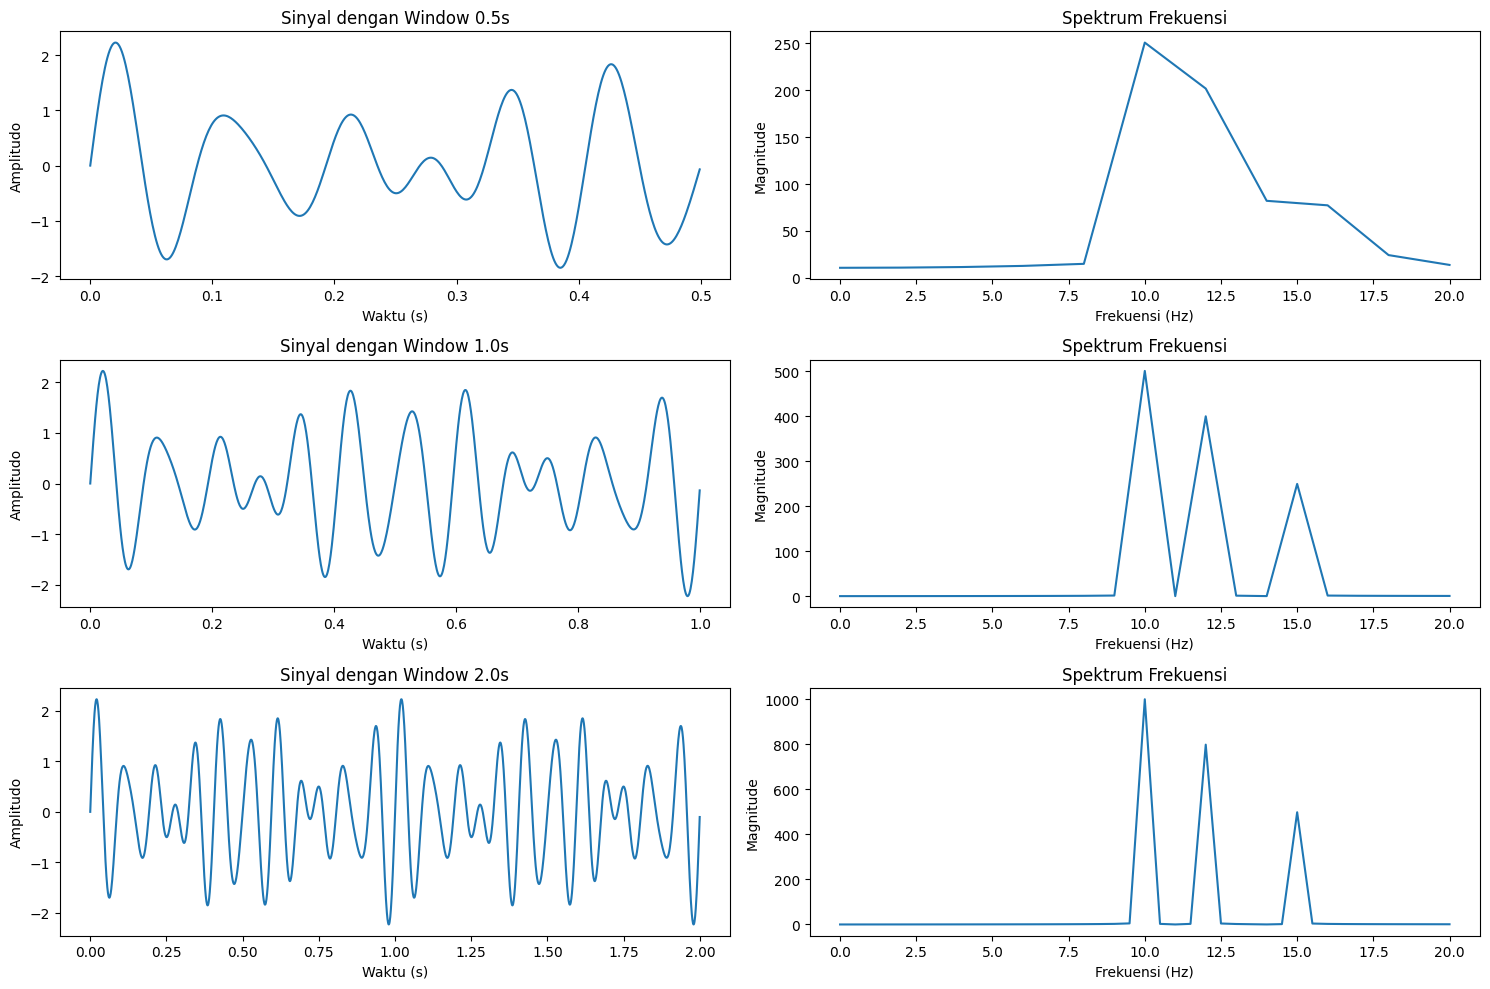

In [15]:
# 1. Buat sinyal dengan tiga frekuensi yang berdekatan
fs = 1000  # sampling frequency
t = np.linspace(0, 5, 5*fs)  # 5 detik sinyal

# Buat tiga sinyal dengan frekuensi berdekatan
f1, f2, f3 = 10, 12, 15  # frekuensi dalam Hz
signal = (np.sin(2 * np.pi * f1 * t) +
          0.8 * np.sin(2 * np.pi * f2 * t) +
          0.5 * np.sin(2 * np.pi * f3 * t))

# 2. Analisis dengan panjang window berbeda
window_sizes = [fs//2, fs, fs*2]  # 0.5s, 1s, 2s windows

plt.figure(figsize=(15, 10))
for i, window_size in enumerate(window_sizes, 1):
    # Ambil sebagian sinyal sesuai window
    windowed_signal = signal[:window_size]
    t_window = t[:window_size]

    # Hitung FFT
    freq, fft_result = calculate_scipy_fft(windowed_signal, fs)

    # Plot
    plt.subplot(3, 2, 2*i-1)
    plt.plot(t_window, windowed_signal)
    plt.title(f'Sinyal dengan Window {window_size/fs}s')
    plt.xlabel('Waktu (s)')
    plt.ylabel('Amplitudo')

    plt.subplot(3, 2, 2*i)
    freq_mask = (freq >= 0) & (freq <= 20)
    plt.plot(freq[freq_mask], np.abs(fft_result)[freq_mask])
    plt.title(f'Spektrum Frekuensi')
    plt.xlabel('Frekuensi (Hz)')
    plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

1. Pengaruh Panjang window terhadap Frekeuensi solution :
- Window 0.5s : N = 500, Δf=2Hz,
ketiga frekuensi berdekatan dan sulit untuk dibedakan karena resolusi hanya membedakan jarak 2Hz atau lebih
- Window 1s : N = 1000, Δf=1Hz, frekuensi 10Hz dan 12Hz mulai terpisah, akan tetapi sprektrum masih lebar karena panjang window moderat
- Window 2s : N = 2000, Δf=0.5Hz, ketiga frekuensi dapat dibedakan dengan jelas, karena resolusi tinggi memungkinkan pemisahan frekuensi berdekatan.

2. Pengaruh Panjang window terhadap Magnitude Spectrum :
- Window 0.5s : Spektrum lebih lebar dan kurang presisi, karena panjang window pendek menghasilkan ketidakpastian lebih besar pada amplitudo setiap frekuensi.
- Window 1s : Magnitude spectrum lebih tajam, dengan puncak yang lebih jelas dibandingkan dengan window lebih pendek.
- Window 2s : Magnitude spectrum sangat presisi dengan puncak tajam, karena sinyal mencakup lebih banyak periode dari masing-masing frekuensi.

3. Window size yang paling optimal untuk mendeteksi ketiga frekuensi adalah window 2s karena frekuensi terpisah dengan jelas, dan magnitude spectrum lebih akurat.

4. Frequensi resolution (Δf = fs/N) untuk setiap window size :
- Window 0.5s (N = 500): Δf= fs/N = 1000/500 = 2Hz
- Window 1s (N = 1000): Δf= fs/N = 1000/1000 = 1Hz
- Window 02s (N = 2000): Δf= fs/N = 1000/2000 = 0.5Hz
5. Trade-off antara frequency resolution dan time resolution :
- Frequency Resolution:
Meningkat dengan window size yang lebih panjang dan membutuhkan lebih banyak sampel, sehingga resolusi dalam domain frekuensi lebih tajam.
- Time Resolution:
Berkurang dengan window size yang lebih panjang dan sulit dilacak jika window panjang.

# Tugas 3 - 6
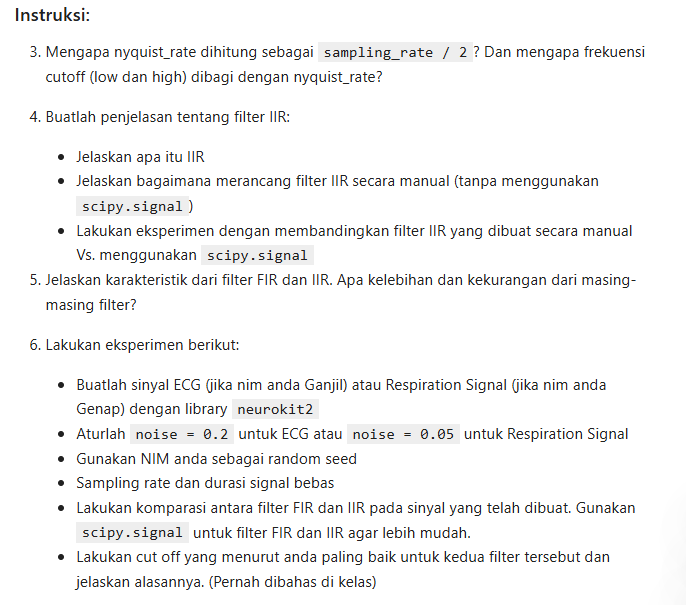

3. Mengapa nyquist_rate dihitung sebagai sampling_rate / 2? Dan mengapa frekuensi cutoff (low dan high) dibagi dengan nyquist_rate?

- Nyquist rate dihitung dengan rumus sampling rate/2 dikarenakan Nyquist rate sendiri merupakan setengah dari sampling rate yang didasari oleh Nyquist-Shannon Sampling Theorem yang menyatakan bahwa untuk merekonstruksi sinyal analog secara sempurna dari sampelnya, frekuensi sampling (fs) harus minimal 2 kali lipat dari frekuensi maksimum sinyal(fmax).
- Frekuensi cutoff dibagi dengan nyquist_rate .karena filter sinyal digital memerlukan domain diskret dengan rentang frekuensi yang valid adalah dari 0 hingga nyquist_rate, dan pembagian ini menghasilkan frekuensi normalisasi dimana rentang frekuensi normalisasi digunakan untuk menentukann batas filter dengan tepat.

---
4. Filter IIR
- IIR (Infinite Impulse Response) merupakan jenis filter digital yang memiliki respons impuls yang mendekati nol dan filter ini mengunnakan umpan balik yang memungkinan filter memerlukan sedikit koefisien dibandingkan FIR.
- Berikut merupakan langkah - langkah untuk merancang Filter IIR secara manual :
  1.   Import Library yang dibutuhkan, yaitu numpy(mengelola array), matplotlib(visualisasi), dan SymPy(anilisis simbolis)
  2. Definisikan spesifikasi filter, yaitu low-pass, high-pass, dan juga orde
  3. Pilih prototipe analog seperti Butterworth  untuk mendesain filter analog
  4. Transformasi ke domain digital seperti metode bilinear transform untuk mengonversi desain analog ke domain digital.
  5. Normalisasi Koefisien agar filter stabil
- Dibawah ini merupakan eksperimen dengan membandingkan filter IIR yang dibuat secara manual dengan menggunakan scipy.signal



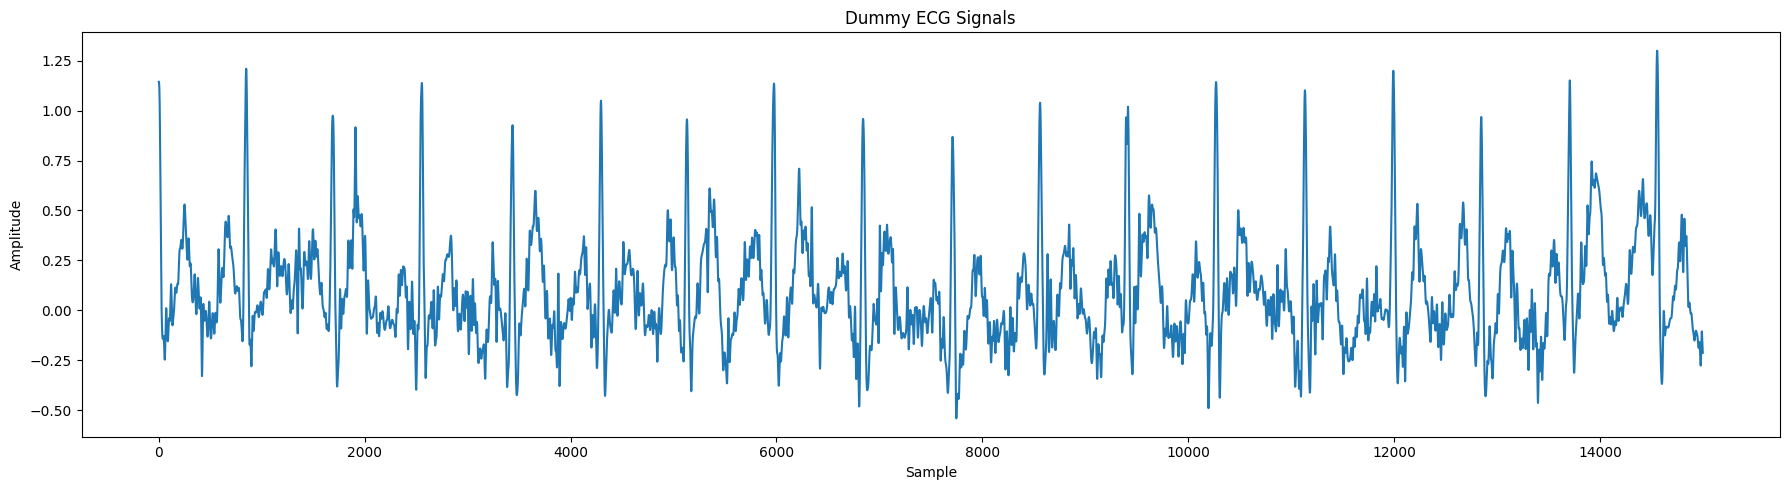

In [21]:
#Pembuatan Dummy Signal
duration = 15
fs = 1000

ecg = nk.ecg_simulate(
    duration=duration,
    sampling_rate=fs,
    heart_rate=70,
    noise=0.25,
    random_state=1113
)
plt.figure(figsize=(18, 5))
plt.plot(ecg)
plt.title("Dummy ECG Signals")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

In [23]:
#mengatur spesifikasi filter
lowcut_iir = 0.5 #hz
highcut_iir = 4.0 #hz

In [27]:
#IIR Filter dengan scipy
b, a = butter(1, [lowcut_iir, highcut_iir], btype="bandpass", fs=fs)
waktu_mulai = dt.datetime.now()
filtered_iir_scipy_ecg = filtfilt(b, a, ecg)
waktu_selesai = dt.datetime.now()

print(f"Durasi filter: {waktu_selesai - waktu_mulai}")


Durasi filter: 0:00:00.002696


In [44]:
#IIR Filter Manual
# Fungsi untuk menghitung koefisien filter Butterworth bandpass
def butter_bandpass(lowcut, highcut, fs, order=1):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter_bandpass_low_high(low, high, order)
    return b, a

# Fungsi untuk menghitung koefisien lowpass dan highpass Butterworth orde 1
def butter_bandpass_low_high(low, high, order=1):
    # Koefisien untuk orde 1 (bandpass sederhana)
    # Proses desain bandpass menggunakan desain lowpass dan highpass (bilateral transformation)

    # Koefisien lowpass
    b_lp, a_lp = butter_lowpass(low, order)
    # Koefisien highpass
    b_hp, a_hp = butter_highpass(high, order)

    # Transformasi untuk bandpass
    b = np.convolve(b_lp, b_hp)
    a = np.convolve(a_lp, a_hp)

    return b, a

# Fungsi desain lowpass Butterworth orde 1
def butter_lowpass(cutoff, order=1):
    omega = np.tan(np.pi * cutoff)
    den = np.array([omega, 0])  # Denominator
    num = np.array([omega, 0])  # Numerator

    b = np.array([num[0], num[1]])
    a = np.array([den[0], 1])

    return b, a

# Fungsi desain highpass Butterworth orde 1
def butter_highpass(cutoff, order=1):
    omega = np.tan(np.pi * cutoff)
    den = np.array([omega, 0])  # Denominator
    num = np.array([omega, -omega])  # Numerator

    b = np.array([num[0], num[1]])
    a = np.array([den[0], 1])

    return b, a

# Fungsi untuk menerapkan filter IIR secara manual (menggunakan persamaan rekursif)
def apply_iir_filter(x, b, a):
    y = np.zeros_like(x)

    for n in range(len(x)):
        for i in range(len(b)):
            if n - i >= 0:
                y[n] += b[i] * x[n - i]
        for j in range(1, len(a)):
            if n - j >= 0:
                y[n] -= a[j] * y[n - j]

    return y

# Desain filter IIR bandpass secara manual
b, a = butter_bandpass(lowcut_iir, highcut_iir, fs, order=1)

# Terapkan filter pada sinyal ECG
waktu_mulai = dt.datetime.now()
filtered_iir_manual = apply_iir_filter(ecg, b, a)
waktu_selesai = dt.datetime.now()

print(f"Durasi filter: {waktu_selesai - waktu_mulai}")

Durasi filter: 0:00:00.202596


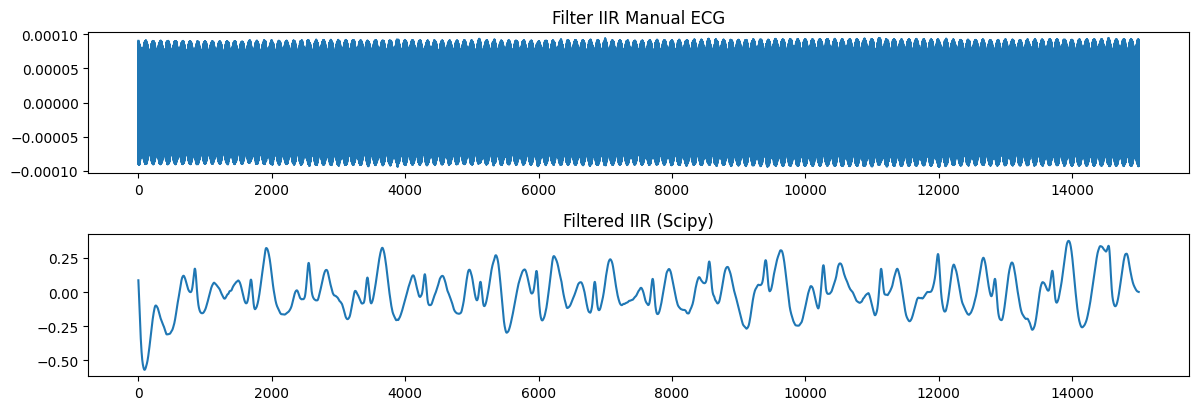

In [53]:
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(filtered_iir_manual, label='Filter IIR Manual ECG')
plt.title('Filter IIR Manual ECG')
plt.subplot(3, 1, 2)
plt.plot(filtered_iir_scipy_ecg, label='Filtered IIR (Scipy)')
plt.title('Filtered IIR (Scipy)')
plt.tight_layout()
plt.show()


Dari eksperiment diatas dapat disimpulkan bahwa Scipy lebih mudah untuk digunakan dan telah dioptimalkan untuk berbagai kasus desain filter. Pada filter IIR secara manual penulis kurang yakin dengan filter yang dibuat karena hasil nya sangat berbeda. Untuk kelebihan dari IIR manual sendiri kita lebih fleksibilitas untuk memodifikasi desain sinyal menggunakan transformasi alternatif, akan tetapi filter manual tidak efisien untuk desain filter yang kompleks.



---

5. Karakteristik FIR dan IIR
  - FIR
    - Kelebihan
      - FIR selalu stabil karena tidak ada umpan balik
      - FIR dapat dirancang dengan fase linear yang merupakan hala penting dalam aplikasi seperti pemrosesan audio
      - Desain filter IIR lebih mudah dan sederhana karena hanya melibatkan koefisien numerator
    - Kekurangan
      - Jumlah koefisien besar, Untuk filter dengan karakteristik frekuensi yang tajam, FIR membutuhkan banyak koefisien (orde filter yang tinggi), yang mengarah pada peningkatan kebutuhan komputasi dan memori.
  - IIR
    - Kelebihan
      - IIR lebih efisiensi komputasi karena orde yang lebih rendah
      - Desain filter lebihg cepat karena memerlukan sedikit koefisien untuk mencapai hasil yang serupa
      - Lebih fleksibel dalam bentuk respon frekuensinya karena melibatkan kedua zero pole
    - Kekurangan
      - Stabilitas terbatas karena menggunakan umpan balik yang menjadikan tidak stabil jika koefisien tidak dipilih dengan hati-hati
      - Memiliki distorsi fase yang dapat merusak kualitas sinyal jika fase linear diperlukan seperti pada pemrosesan audio


---

6. NIM = 121140135 (ganjil) yang berarti membuat eksperimen sinyal ECG dengan noise = 0.2 dan NIM menggunakan random seed dengan sampling rate yang dipilih = 13500 dan durasi = 35 dan lakukan komparasi filter FIR dan IIR dengan scipy dan lakukan cutoff yang terbaik. Dibawah ini merupakan eksperimen dari hal tersebut
      

In [65]:
#Membuat Sinyal dan random seed

# Set random seed
NIM = 121140135
np.random.seed(NIM)

# Simulasi sinyal ECG
sampling_rate = 1350
duration = 35
ecg_signal = nk.ecg_simulate(duration=duration, sampling_rate=sampling_rate, noise=0.2)

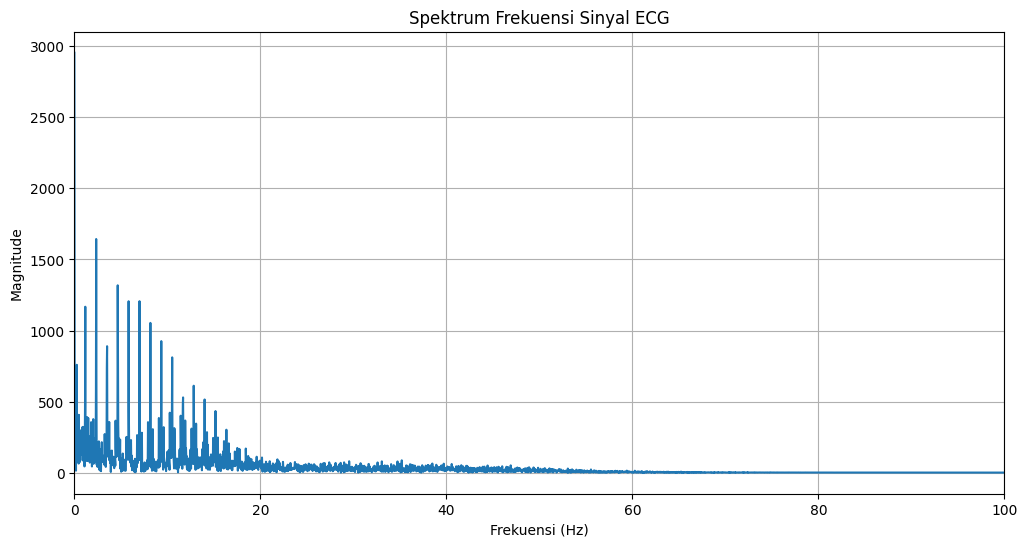

In [66]:
#Melakukan FFT untuk menentukan cutoff terbaik
n = len(ecg_signal)
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)
fft_values = np.fft.fft(ecg_signal)

# Mengambil hanya bagian positif dari frekuensi
positive_frequencies = frequencies[:n // 2]
magnitude = np.abs(fft_values)[:n // 2]

# Visualisasi spektrum frekuensi
plt.figure(figsize=(12, 6))
plt.plot(positive_frequencies, magnitude)
plt.title('Spektrum Frekuensi Sinyal ECG')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 100)  # Fokus pada frekuensi rendah untuk analisis
plt.grid()
plt.show()

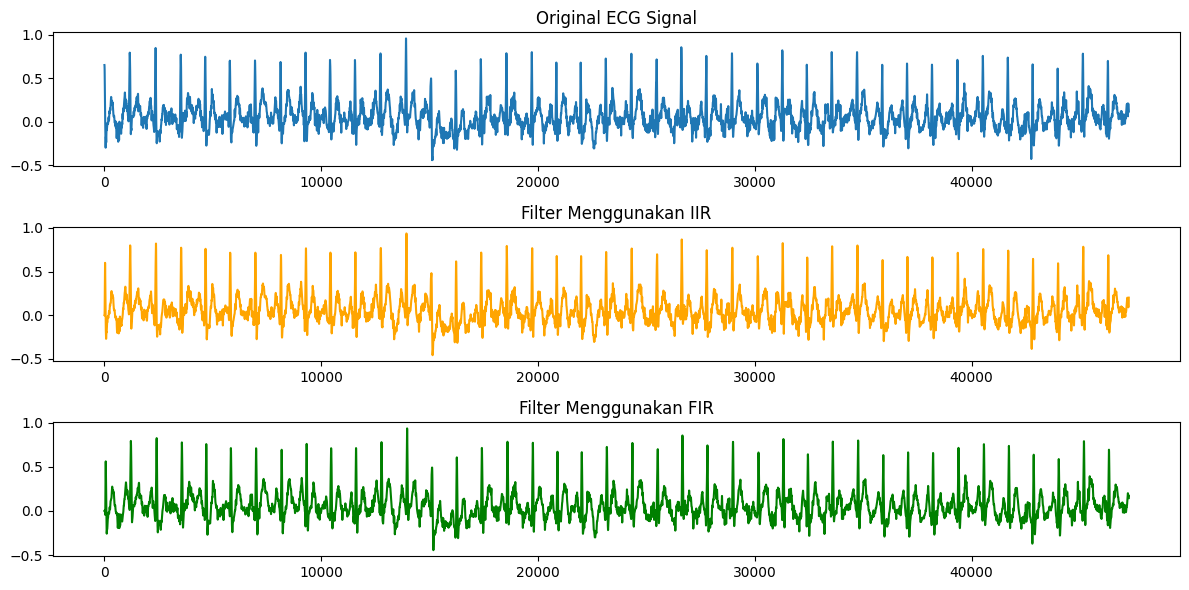

Durasi filter IIR : 0:00:00.001889
Durasi filter FIR : 0:00:00.002592


In [69]:
# Fungsi untuk menerapkan filter IIR
def iir_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = lfilter(b, a, data)
    return y

# Fungsi untuk menerapkan filter FIR
def fir_filter(data, cutoff, fs, numtaps=101):
    nyquist = 0.5 * fs
    taps = firwin(numtaps, cutoff/nyquist)
    return lfilter(taps, 1.0, data)

# Set cutoff frequency
cutoff_frequency = 40  # Contoh cutoff frequency dalam Hz

# Terapkan filter IIR dan hitung waktu komputasi
waktu_mulaiIIR = dt.datetime.now()
filtered_iir = iir_filter(ecg_signal, cutoff_frequency, sampling_rate)
waktu_selesaiIIR = dt.datetime.now()

# Terapkan filter FIR dan hitung waktu komputasi
waktu_mulaiFIR = dt.datetime.now()
filtered_fir = fir_filter(ecg_signal, cutoff_frequency, sampling_rate)
waktu_selesaiFIR = dt.datetime.now()

# Visualisasi hasil
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(ecg_signal, label='Original ECG Signal')
plt.title('Original ECG Signal')
plt.subplot(3, 1, 2)
plt.plot(filtered_iir, label='Filtered ECG Signal (IIR)', color='orange')
plt.title('Filter Menggunakan IIR')
plt.subplot(3, 1, 3)
plt.plot(filtered_fir, label='Filtered ECG Signal (FIR)', color='green')
plt.title('Filter Menggunakan FIR')
plt.tight_layout()
plt.show()

print(f"Durasi filter IIR : {waktu_selesaiIIR - waktu_mulaiIIR}")
print(f"Durasi filter FIR : {waktu_selesaiFIR - waktu_mulaiFIR}")

Dari eksperimen berdasarkan soal no 6, mendapatkan kesimpulan sebagai berikut :
Filter FIR cenderung lebih stabil dan memiliki respons frekuensi yang lebih baik, sedangkan filter IIR lebih efisien dalam hal penggunaan memori dan komputasi. Frekuensi Cutoff dipilih berdasarkan FFT yang telah dilakukan dimana sinyal memiliki frekuensi utama dibawah 40Hz, sehingga Cutoff dilakukan di 40Hz

# Daftar Pustaka
1. https://chatgpt.com/share/6740a9d5-9310-8002-8c54-07d18d47dfb7
2. https://github.com/informatika-itera/if3024-handson/tree/main